In [1]:
import read_mta_stations as s
import read_mta_turnstile as t
import read_tech_compaines as c
import create_station_heatmap as h

In [2]:
stations = s.read_mta_stations()
stations.sample(5)

,key,name,LINE,lon,lat
173,174,176th St,4,-73.91179399884471,40.8484800012369
225,226,Shepherd Ave,A-C,-73.88074999747269,40.6741300014559
153,154,21st St,G,-73.9495999997552,40.7441286664954
198,199,28th St,1-2,-73.99336500134324,40.74721499918219
401,402,Fulton St,2-3,-74.00657099970202,40.70941599925865


In [3]:
companies = c.read_tech_companies()
companies

,COMPANY,LAT,LON
0,Accenture Content Studio,40.725410,-74.004690
1,Accenture,40.763000,-73.979030
2,Thoughtworks,40.744678,-73.984901
3,Amazon,40.753050,-73.999440
4,Bank of America,40.755390,-73.984710
5,Facebook,40.730701,-73.991531
6,HP,40.744830,-73.999460
7,Microsoft,40.756989,-73.989708
8,Two Sigma,40.723270,-74.004390
9,Workday,40.748170,-73.985000


In [4]:
turnstiles = t.read_mta_turnstile()
turnstiles.sample(5)

Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180505.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180512.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180519.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180526.txt
Reading: http://web.mta.info/developers/data/nyct/turnstile/turnstile_180602.txt


,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,entries_offset,exits_offset,hourly_entries,hourly_exits
930799,132414,R147,R033,04-05-01,TIMES SQ-42 ST,1237ACENQRS,IRT,05/04/2018,04:00:00,REGULAR,10,1024.0,2018-05-04 04:00:00,10,1024.0,0,0.0
189563,131121,R142,R293,01-00-02,34 ST-PENN STA,123ACE,IRT,05/06/2018,14:00:00,REGULAR,6287856,5480565.0,2018-05-06 14:00:00,6288078,5480915.0,222,350.0
777227,89966,N409,R268,00-00-00,METROPOLITAN AV,GL,IND,05/19/2018,21:00:00,REGULAR,4707399,11197202.0,2018-05-19 21:00:00,4707633,11197737.0,234,535.0
273794,156745,R245A,R051,01-00-00,59 ST,456NQRW,IRT,05/23/2018,04:00:00,REGULAR,11555029,4057601.0,2018-05-23 04:00:00,11555187,4057785.0,158,184.0
407963,97395,N519A,R461,01-06-01,B'WAY-LAFAYETTE,BDFQ6,IND,05/14/2018,05:00:00,REGULAR,2273625,2040628.0,2018-05-14 05:00:00,2273727,2040715.0,102,87.0


## Function to build a heat map

In [38]:
import seaborn as sns
import pandas as pd

# Probably turn this into a function to make it easier
agg = turnstiles.groupby(['STATION','DATE','TIME'])[['hourly_entries']].sum().reset_index()
# agg[agg.hourly_entries == 183956]
agg.DATE = pd.to_datetime(agg.DATE, format='%m/%d/%Y')
agg.TIME = pd.to_datetime(agg.TIME, format='%H:%M:%S')
agg['day_name'] = agg.DATE.dt.day_name()
agg['hour_of_day'] = agg.TIME.dt.hour

# turnstiles[turnstiles.hourly_entries > 100000].sort_values('hourly_entries')

,STATION,DATE,TIME,hourly_entries,day_name,hour_of_day
0,1 AV,2018-04-28,1900-01-01 00:00:00,1468,Saturday,0
1,1 AV,2018-04-28,1900-01-01 04:00:00,598,Saturday,4
2,1 AV,2018-04-28,1900-01-01 08:00:00,2856,Saturday,8
3,1 AV,2018-04-28,1900-01-01 12:00:00,5368,Saturday,12
4,1 AV,2018-04-28,1900-01-01 16:00:00,5501,Saturday,16


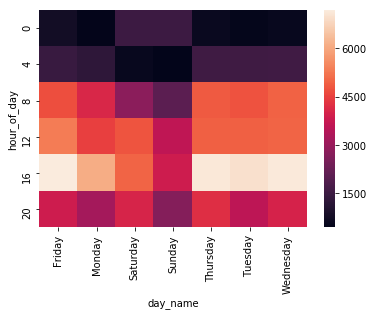

In [55]:
hm = agg.loc[agg.STATION == '1 AV',['hour_of_day','day_name','hourly_entries']]
hm = hm.groupby(['hour_of_day','day_name'])['hourly_entries'].mean().reset_index()
hm = hm.pivot(index='hour_of_day',columns='day_name',values='hourly_entries')
sns.heatmap(hm)
sns.xlable;


In [91]:
from geopy.distance import geodesic

# Make a dataframe cross-product stations to companies

In [68]:
import numpy as np
stations['_tmpkey'] = 1
companies['_tmpkey'] = 1
station_companies = pd.merge(companies, stations, how='outer', on='_tmpkey').drop('_tmpkey', axis=1)
station_companies['distance'] = np.nan
station_companies.head()

,COMPANY,LAT,LON,key,name,LINE,lon,lat,distance
0,Accenture Content Studio,40.72541,-74.00469,159,103rd St,1,-73.96837899960818,40.799446000334825,NaN
1,Accenture Content Studio,40.72541,-74.00469,458,103rd St,4-6-6 Express,-73.94747800152219,40.79060000008452,NaN
2,Accenture Content Studio,40.72541,-74.00469,161,103rd St,A-B-C,-73.96137008267617,40.796060739904526,NaN
3,Accenture Content Studio,40.72541,-74.00469,189,103rd St - Corona Plaza,7,-73.86269999830412,40.749865000555545,NaN
4,Accenture Content Studio,40.72541,-74.00469,98,104th St,A-S,-73.83768300060997,40.681711001091195,NaN


In [72]:
station_companies.describe()

,LAT,LON,key,distance
count,6622.000000,6622.000000,6622.000000,0.0
mean,40.749522,-73.921200,238.078224,NaN
std,0.018004,0.248821,139.053302,NaN
min,40.723270,-74.004690,1.000000,NaN
25%,40.740210,-73.999440,119.000000,NaN
50%,40.750410,-73.987354,237.000000,NaN
75%,40.756020,-73.980030,355.000000,NaN
max,40.798939,-73.024742,643.000000,NaN


In [97]:
station_companies['comp_lat_lon'] = list(zip(station_companies.LAT, station_companies.LON))
station_companies['station_lat_lon'] = list(zip(station_companies.lat, station_companies.lon))
station_companies['distance'] = [geodesic(v, station_companies.iloc[k,10]).miles for k, v in enumerate(station_companies.comp_lat_lon)]


KeyError: 'Column not found: DISTANCE'

In [103]:
min_d = station_companies.groupby('COMPANY')['distance'].min().reset_index()
station_companies.merge(min_d, on=['distance','COMPANY'],how='inner')

,COMPANY,LAT,LON,key,name,LINE,lon,lat,distance,comp_lat_lon,station_lat_lon
0,Accenture Content Studio,40.725410,-74.004690,395,Spring St,A-C-E,-74.00373899843763,40.72622700129312,0.075302,"(40.72541, -74.00469)","(40.72622700129312, -74.00373899843763)"
1,Accenture,40.763000,-73.979030,350,57th St,F,-73.97736800085171,40.76408500081713,0.114929,"(40.763, -73.97903000000001)","(40.76408500081713, -73.97736800085171)"
2,Thoughtworks,40.744678,-73.984901,200,28th St,4-6-6 Express,-73.98426400110407,40.743069999259035,0.115883,"(40.744678, -73.98490100000001)","(40.743069999259035, -73.98426400110407)"
3,Amazon,40.753050,-73.999440,470,34th St - Hudson Yards,7-7 Express,-74.00219709442206,40.75544635961596,0.219710,"(40.75305, -73.99944)","(40.75544635961596, -74.00219709442206)"
4,Bank of America,40.755390,-73.984710,60,42nd St - Bryant Pk,B-D-F-M,-73.98459099904711,40.754184001312545,0.083451,"(40.755390000000006, -73.98470999999999)","(40.754184001312545, -73.98459099904711)"
5,Facebook,40.730701,-73.991531,1,Astor Pl,4-6-6 Express,-73.99106999861966,40.73005400028978,0.050781,"(40.730701, -73.99153100000001)","(40.73005400028978, -73.99106999861966)"
6,HP,40.744830,-73.999460,436,23rd St,A-C-E,-73.99804100117201,40.74590599939995,0.105158,"(40.74483, -73.99946)","(40.74590599939995, -73.99804100117201)"
7,Microsoft,40.756989,-73.989708,362,42nd St - Port Authority Bus Term,A-C-E,-73.98973500085859,40.757307998551504,0.022057,"(40.756989000000004, -73.989708)","(40.757307998551504, -73.98973500085859)"
8,Two Sigma,40.723270,-74.004390,90,Canal St,1-2,-74.0062770001748,40.72285399778783,0.103138,"(40.72327, -74.00439)","(40.72285399778783, -74.0062770001748)"
9,Workday,40.748170,-73.985000,366,Herald Sq - 34th St,B-D-F-M,-73.98777189072918,40.74978939990011,0.183426,"(40.74817, -73.985)","(40.74978939990011, -73.98777189072918)"


>>> from geopy.distance import geodesic
>>> newport_ri = (41.49008, -71.312796)
>>> cleveland_oh = (41.499498, -81.695391)
>>> print(geodesic(newport_ri, cleveland_oh).miles)